Debugging in Python
===================

Arguably, the most difficult part about writing software is figuring out why it isn't working 
correctly, or debugging. For us, there are two main types of issues that can pop up in our code:
* Compiler issues
* Runtime errors

Let's talk about each of these individually.

Compilation issues
---------------
I'm not going to go into the topic of compiled languages vs. interpreted languages here, and in fact python is kind 
of weird in this regard (see e.g. <http://net-informations.com/python/iq/interpreted.htm>). For lack of a better term, I'm going to call errors that crop up before we actually run our python code "compilation errors". In python, most of these errors are 
syntax errors, where the code as written has some fundamental flaw in the python syntax itself. Undoubtably you've seen these before because 
either you misspelled a python function or special word, forgotten a colon after defining a loop or an if statement, or just had some 
other typo that meant Python got confused. 

The good news about these types of errors is that Python will give you a message explaining the error itself and what went wrong. Let's see an 
example:


In [2]:
a = 10
b = 18
print(a,b)
c = a + b
print c

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(c)? (<ipython-input-2-714954058355>, line 5)

If you write those lines in a new file and execute them using Spyder, you can see that the code never actually ran since the first 
print statement which had the correct syntax wasn't executed. Python caught the error in the last line before actually executing 
any of the code, and in the meantime printed a message that helps you figure out what was done wrong (note that if this code snippet worked on your computer, you are probably using python 2.7 and not python3!

The most common types of compilation errors that you might encounter are syntax errors and indentation errors:

In [3]:
a = 10
b = 18
print(a,b)
c = a + b
    print c

IndentationError: unexpected indent (<ipython-input-3-407e7048d86c>, line 5)

Since python catches these errors for you before the code even runs, compilation errors are generally easy to fix, at least once you have some 
amount of experience with programming in python. Look at the error message that is printed and the line where the error occurred and you should 
have a pretty good idea about how to fix the issue.

Runtime Errors
--------------

These are errors that happen during the actual execution of the program. There are lots and lots of ways that you can run into runtime errors 
and for this reason, they can be tricky to figure out. Still, in many cases, python can be helpful with an error message:

In [7]:
a = 10
print("a = {}".format(a))
b = 0
print(a/b)

a = 10


ZeroDivisionError: division by zero

As you can see, this time the program ran and we got output from the 1st print statement. It wasn't until program flow made it to the 4th line that python ran into an error, in this case we tried to divide by zero, which is no good. Like before, python told me the line where the error occurred and 
gave me a pretty good indication of what the error is.

Another example:

In [8]:
a = 10
print("a = {}".format(a))
a.append(15)

a = 10


AttributeError: 'int' object has no attribute 'append'

This is an error that you might have seen before. An AttributeError is an error that shows up when you are trying to do something to a particular 
datatype, but that datatype doesn't have the ability to do it. In this case, I am trying to use the `append()` method on an `int`. Well, the 
`append()` method only belongs to the `list` datatype so of course it's not going to work!

Another one:

In [9]:
a = 'bob'
print("a = {}".format(a))
b = int(a)

a = bob


ValueError: invalid literal for int() with base 10: 'bob'

ValueError will get thrown in lots of different issues when some function is getting passed a variable that has the correct datatype but an inappropriate value. In this example, you are more than welcome to pass the `int()` function a string, but it had better be the string representation of an 
actual number.

Just a couple more:

In [10]:
a = 109583920396
print("a = {}".format(a))
b = a[5]

a = 109583920396


TypeError: 'int' object is not subscriptable

TypeErrors are also very common and they happen when an operation or function is performed on a variable that has the wrong type. Here, 
we can't index an integer we can only do that operation on iterables.

Last one:

In [12]:
a = 10
print("a = {}".format(a))
b = (a +20 - 3
     
print(b)

SyntaxError: invalid syntax (<ipython-input-12-0fb6922fc090>, line 5)

It's another syntax error, but it's a tricky one. The error isn't really in line 5. This error gets students a lot, especially when 
writing complicated mathematical expressions. The error is actually in line 3. We forgot a close paren ).

To reiterate, in all of these examples, python has tried to help us out as much as possible by telling us where the error occurred and the type of error. However, python error messages can often be pretty cryptic and difficult to decipher if you haven't encountered them before. So, even if you are given a message it may take some thought or asking someone to figure out exactly the issue. Also, you might run into an error message that is thrown at some point in the execution of some code that you didn't write, such as a built in function or a separate module that you are trying to use. In this 
case, the problem is most likely still in your code but python didn't catch the issue until it tried to do something else. 

ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

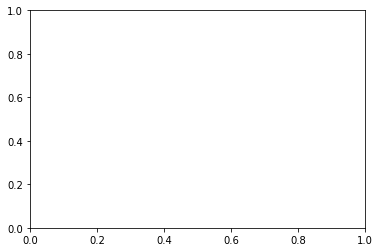

In [13]:
from matplotlib import pyplot
a  = [10,20]
b = [500]
pyplot.plot(a,b)

Yikes! That's a lot of information. This is all printed because of a relatively simple error in my code. I am trying to print b vs a, but b and a 
don't have the same number of elements. In this case, python is still pretty helpful because it shows me the line in my code that actually 
caused the problem (sort of): line 4 where I called the `plot()` function. Of course, to fix the error itself, I would have to change 
how I defined the variable `b`, so the fix isn't on the line that python is suggesting. 

The point is, this can all get tricky as your code gets more and more complex. In this last example, it is clear that `a` and `b` don't have the 
same number of elements. But what if I had defined those two variables using a couple of complex `for` loops 200 lines above the call to plot. Then, 
it might not be so obvious that those variables are the problem. Usually, error messages alone can only direct us to the issue, but we might 
need to do some more digging to really understand it. 

So, we need some strategies to help us figure out what the error is. 

Strategies
----------

When python throws an error and it isn't obvious to you what you need to fix, what should you do? In my experience, these are some 
actions that are typically employed:
* Give up. Programming is stupid anyway.
* Change random things in your code until it works. It has to work eventually!
* Stare at the screen without blinking for at least 2 hours. 

Should these strategies prove to not be effective I suggest trying the most important one: **get more information!!** I don't 
mean get more information from the internet or whatever, I mean figure out what your code is actually doing. You may think it is 
doing one thing, but is that really what's going on? 

In general, what I mean by get more information is print out information 
about the variables that you are working with. In the above example, the first thing that I would do when encountering the above error is notice that 
the part of my code that was having trouble was line 4. So, I would immediately check the value of the variables `a` and `b` right 
before that line. The "easiest" way to do that is to just add a print statement there:

In [14]:
print(a)
print(b)

[10, 20]
[500]


Oh, of course I can't plot `b` vs `a`! 

Often, debugging is a matter of printing out a bunch of information about your code and rerunning it over and over, progressively going backwards 
through your code from the point at which you know that an error occurred. Printing variables, the datatype of a variable, the length of an iterable, 
the shape of a matrix, etc. to ensure that the data store in those variables is exactly what you expect is a great way to 1) verify that your 
code is doing what it is supposed to and 2) figure out where the actual issue is with a program that isn't working.

The python debugger
-------------------

However, there is a streamlined way to do all of this: use the python debugger. I will only discuss one attribute of the python debugger, the 
`breakpoint()` function. In python3, this function is sort of a shortcut to the `set_trace()` function that is part of the `pdb` module. This 
module has a bunch of tools that are useful for debugging, but for our purposes, the ability to set a breakpoint will be most useful.

The `breakpoint()` function works like this: You call the function at some point at your code where you want to get some more information. Once 
program flow reaches the line that contains the breakpoint, execution will stop and hand control over to the Console (via a terminal). 
Then, via the terminal, you can interact with your code in a number of ways. The simplest thing that you can do is print stuff:


In [ ]:
from matplotlib import pyplot
a  = [10,20]
b = [500]
breakpoint()
pyplot.plot(a,b)

--Return--
> <ipython-input-16-351520474b17>(4)<module>()->None
-> breakpoint()


(Pdb)  print(a,b)


[10, 20] [500]


In the format in which I wrote this document, you can see that I get a mini Pdb "prompt" that allows me to enter python code and execute it. 
So, I printed out the values of `a` and `b`. The great thing about a breakpoint is that I can stop execution at a certain point, interact with 
my code, and then continue execution.

In [1]:
from matplotlib import pyplot
a  = [10,20]
b = [500]
breakpoint()
b.append(600)
print(a,b)

--Return--
> <ipython-input-1-2cc4b154db37>(4)<module>()->None
-> breakpoint()


(Pdb)  print(a,b)


[10, 20] [500]


(Pdb)  c


[10, 20] [500, 600]


Here, I typed the letter "c" in the Pdb prompt is a shortcut for the "continue" command, which continues execution of the program from that point. 

There are several commands that we can use when we set a breakpoint and interact with the code:

| shortcut | result |
| -------- | ------ |
| c | continue: continues execution of the code until another breakpoint or until the program ends  |
| s | step: executes the current line and steps through the code one line at a time returning execution to the Pdb prompt after each step |
| n | next: like step, except if the next line is a function call, it will execute that function and then stop execute in the next line in the current function |
| j linenumer | jump: jumps execution to the specified line number. You can jump forward in your code or jump backward |

using `breakpoint()` combined with these commands gives you the ability to quickly get information about what your code is really 
doing in an efficient and controlled way.

Errors without messages
-----------------------

The most difficult issues to debug are those that python doesn't catch. For example, let's say you are creating a program 
that solves for the trajectory of a rocket after it is launched. In your simulation, you set the rocket to launch at 100 m/s at an angle 
of 30 degrees above the horizontal with a starting height of 0 m. You track the rocket for some amount of time and then plot the result only to find that the rocket always has a negative height! No error messages are thrown. Why doesn't this work?!?!

Clearly in this example, you did something wrong and now we need to figure out where. In practice, treating this issue is no different than
treating an issue where python throws an error. **Get more information!!** Just like above, use the python debugger, set a breakpoint, print 
out information about the variables that you are working with, use `s`, `n`, `c`, and/or `j` to systematically work through your 
code to verify it is doing what you expect it to. Eventually, some variable will change in a way that it shouldn't and you can figure out 
where and what the bug is.